# Segmentação de clientes de um supermercado

Um supermercado, através de cartões de fidelidade, possui alguns dados básicos sobre seus clientes, como idade, gênero, renda anual e pontuação de gastos. Tal pontuação é algo que o supermercado atribui ao cliente com base em parâmetros definidos, como comportamento do cliente e dados de compra.

O objetivo deste projeto é segmentar os clientes com base em seus dados de compra, para que o supermercado possa entender melhor os clientes e formular estratégias de negócios de acordo.

Link original para o dataset: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Estrutura de pastas do projeto:

```bash
├── README.md
├── dados
│   ├── Mall_Customers.csv
├── notebooks
│   └── projeto_supermercado_01_eda.ipynb
│   └── ...
├── reports
│   └── ...
```

### - Criando e ativando um Ambiente Virtual
### - Instalando as bibliotecas
### - Criando as subpastas dados, notebooks e reports

## 1) Exibindo as Versões das Principais Bibliotecas utilizadas

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.8.0
NumPy                |     1.25.2
Pandas               |      1.5.3
Scikit-Learn         |      1.3.2
Seaborn              |     0.12.2

Versão do Python: 3.11.8


## 2) Fazendo a Análise Exploratória

In [2]:
# Criando uma Constante que recebe o caminho para a pasta que contém o arquivo csv
DADOS = "../dados/Mall_Customers.csv"

# Carregando o arquivo csv e criando um DataFrame
df = pd.read_csv(DADOS)

# Exiblindo as 5 primeiras linhas do DataFrame
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Exibindo as informações do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
# Exibindo os dados estatísticas do DataFrame
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# Usando o with, gerenciador de contextos do python
# Obs.: formatando as colunas com 2 casas decimais
with pd.option_context("display.float_format", "{:.2f}".format):
    # Exibindo novamente os dados estatísticas do DataFrame 
    display(df.describe())

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [6]:
# Exibindo os dados estatísticas do DataFrame para as Colunas Não Numéricas (Dados Categóricos)
df.describe(exclude = "number")

,Gender
count,200
unique,2
top,Female
freq,112


In [7]:
# Exibindo a soma dos valores nulos em cada uma das colunas
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 2.1) Criando um ProfileReport do DataFrame

- O ProfileReport fornece uma grande quantidade de informações que facilitam o processo para a parte mais importante que é a Análise.

In [8]:
# Instalando a biblioteca ydata-profiling
# python -m pip install ydata-profiling

# Importando a biblioteca ydata-profiling
from ydata_profiling import ProfileReport

# Instalando a biblioteca tqdm
# pip install tqdm

# Importando a biblioteca tqdm
from tqdm.autonotebook import tqdm as notebook_tqdm

# Criando o relatório do perfil do DataFrame
profile = ProfileReport(df)

# Salvando o relatório do perfil do DataFrame na pasta reports
profile.to_file("../reports/eda_supermercado.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## 2.2) Analisando o Pandas Profiling Report
- Apresentando os principais achados

- OVERVIEW

Aba Overview: Dados Estatísticos e Tipos de Variáveis
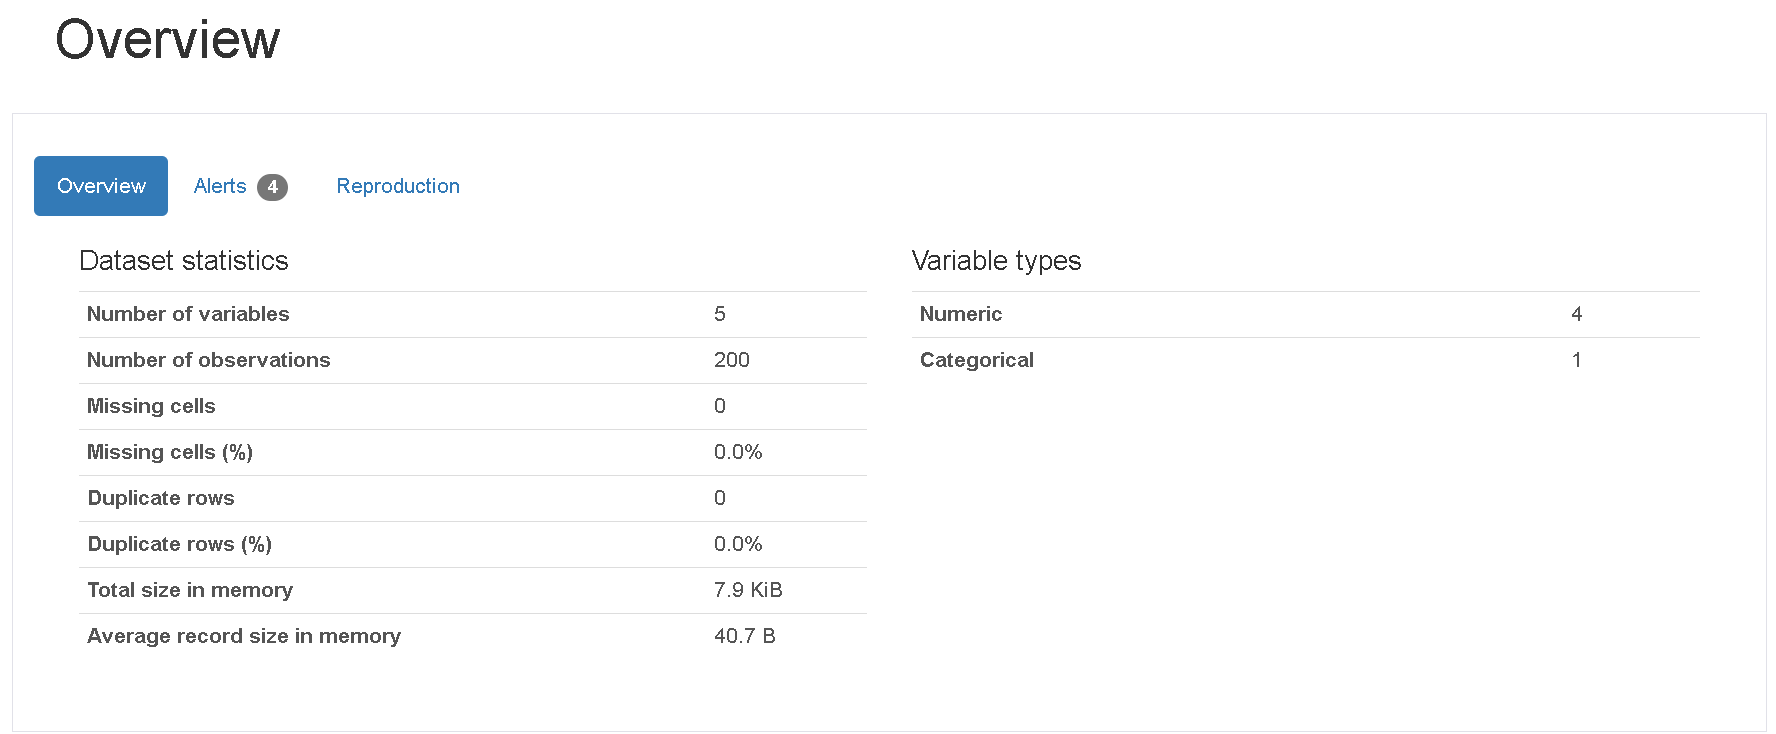

Aba Alerts: Mostra a alta correlação que não faz sentido entre as Colunas Annual Income (k$) e CustomerID que será dropada
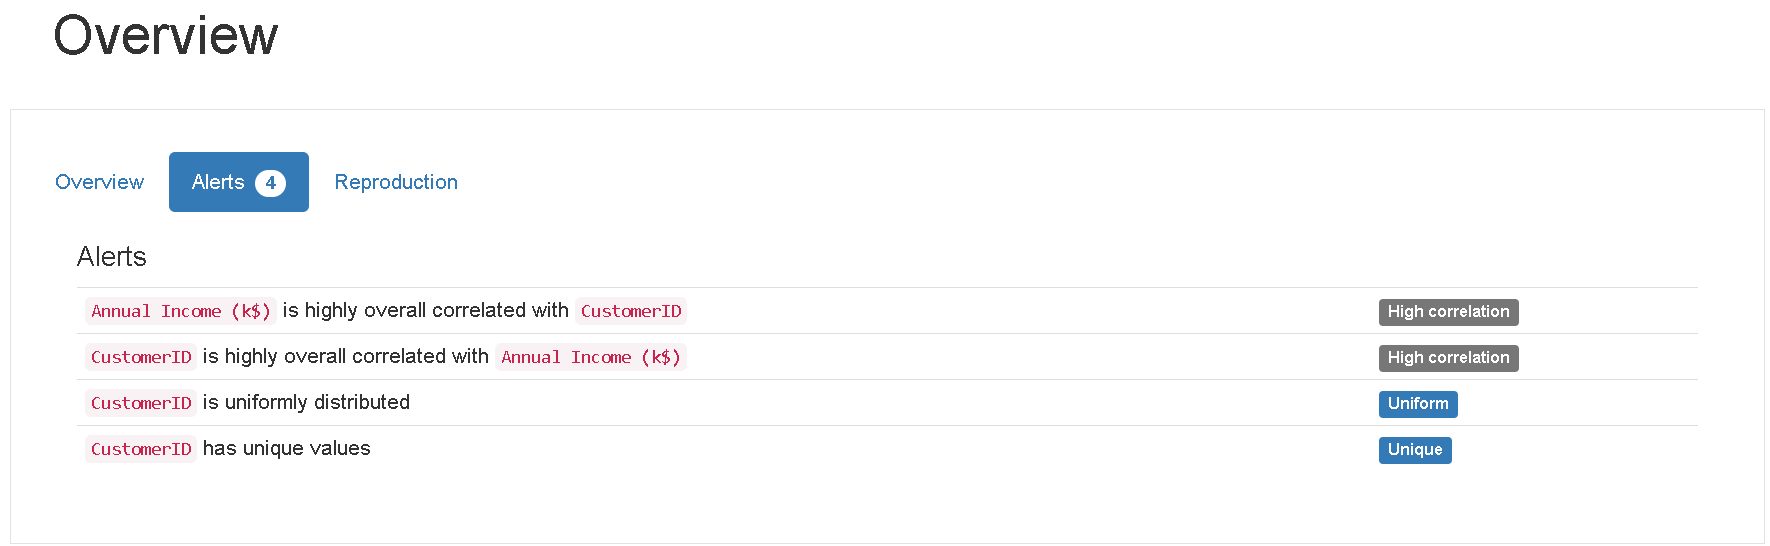

Aba Reproduction: Dados de tempos de processamento para a geração do relatório
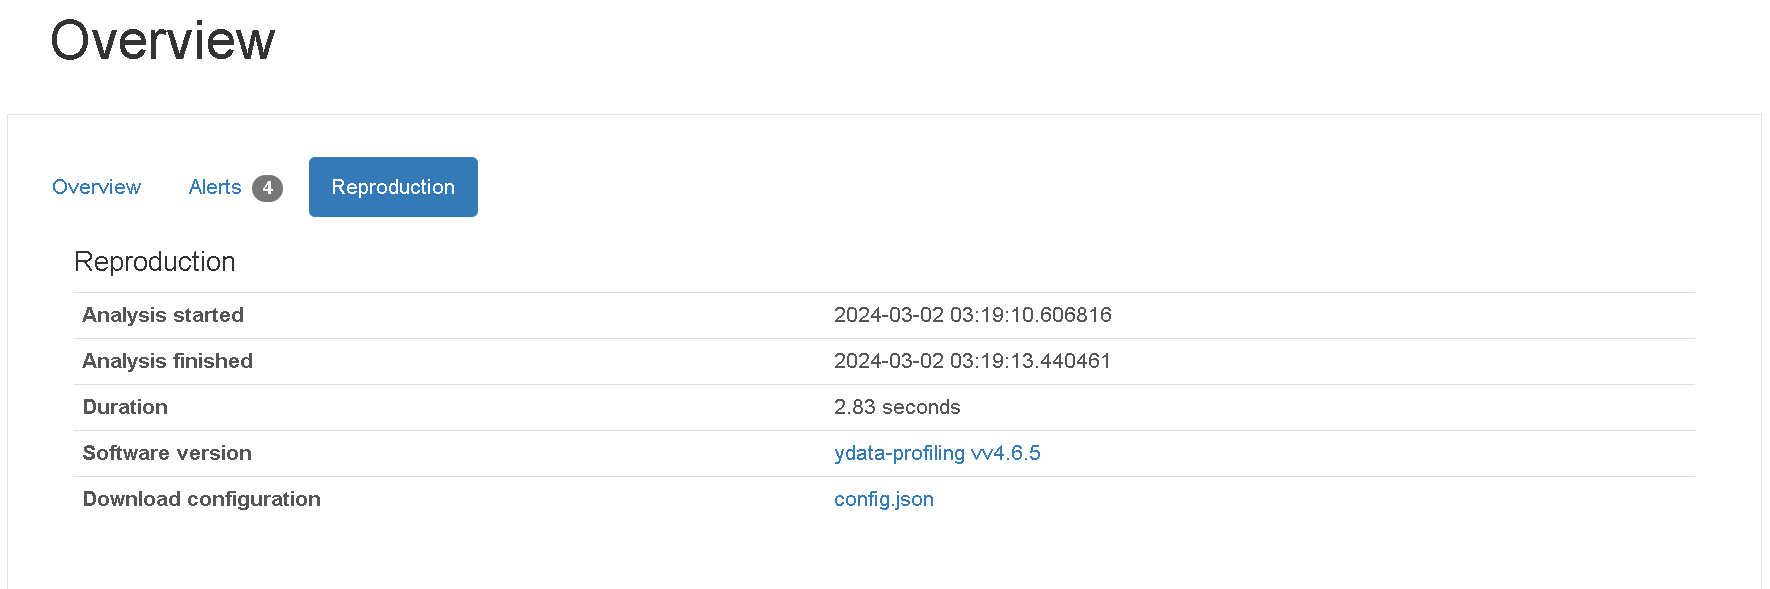

- VARIABLES

Coluna: Gender
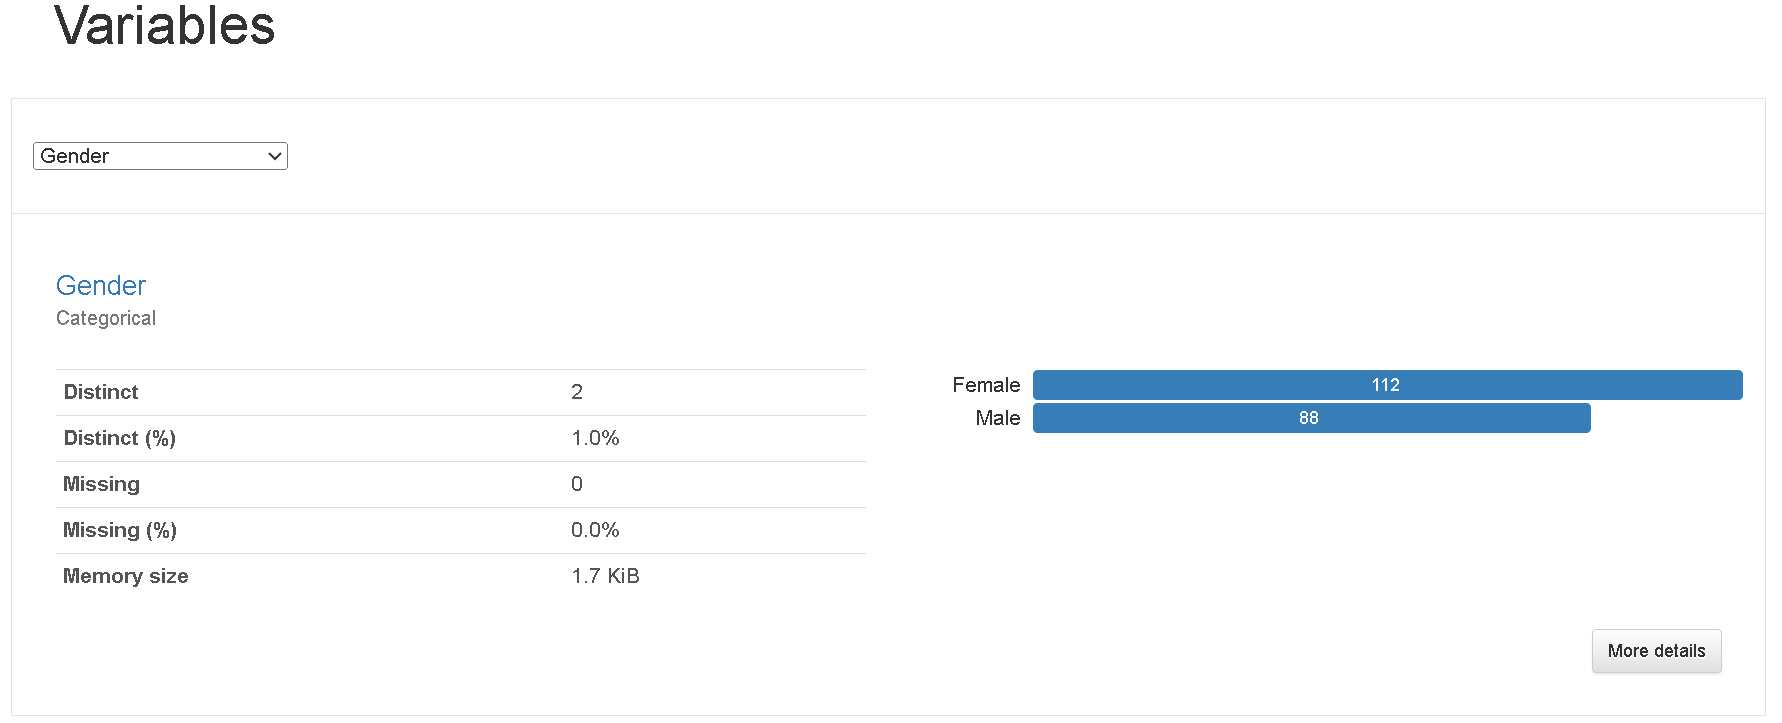

Coluna: Age
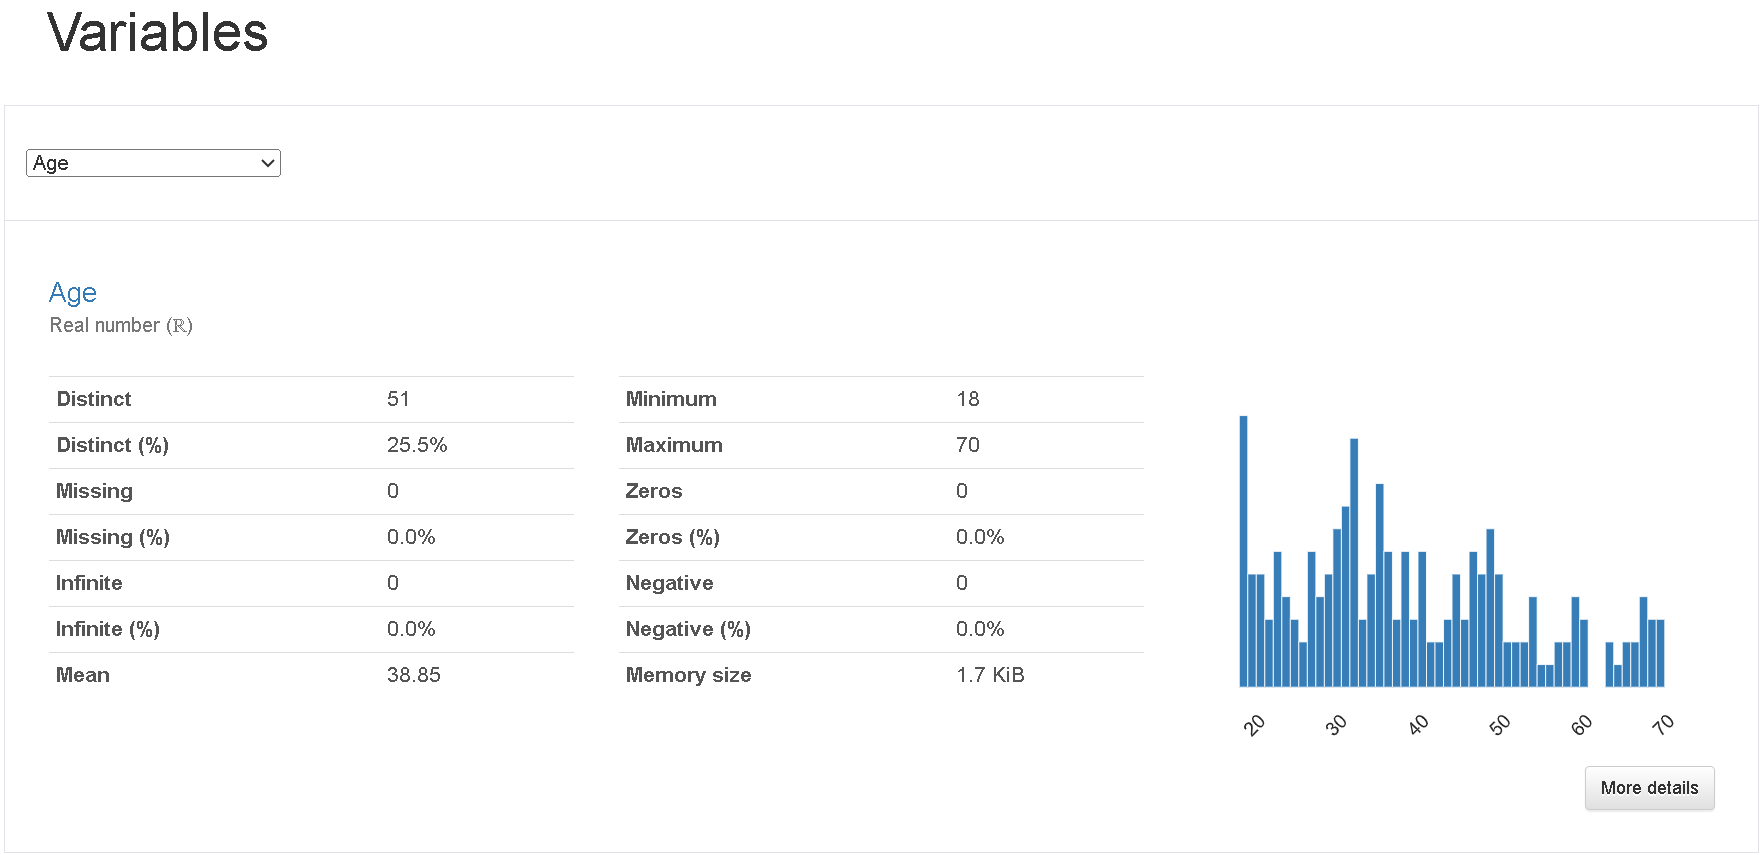

Age Statistics: 
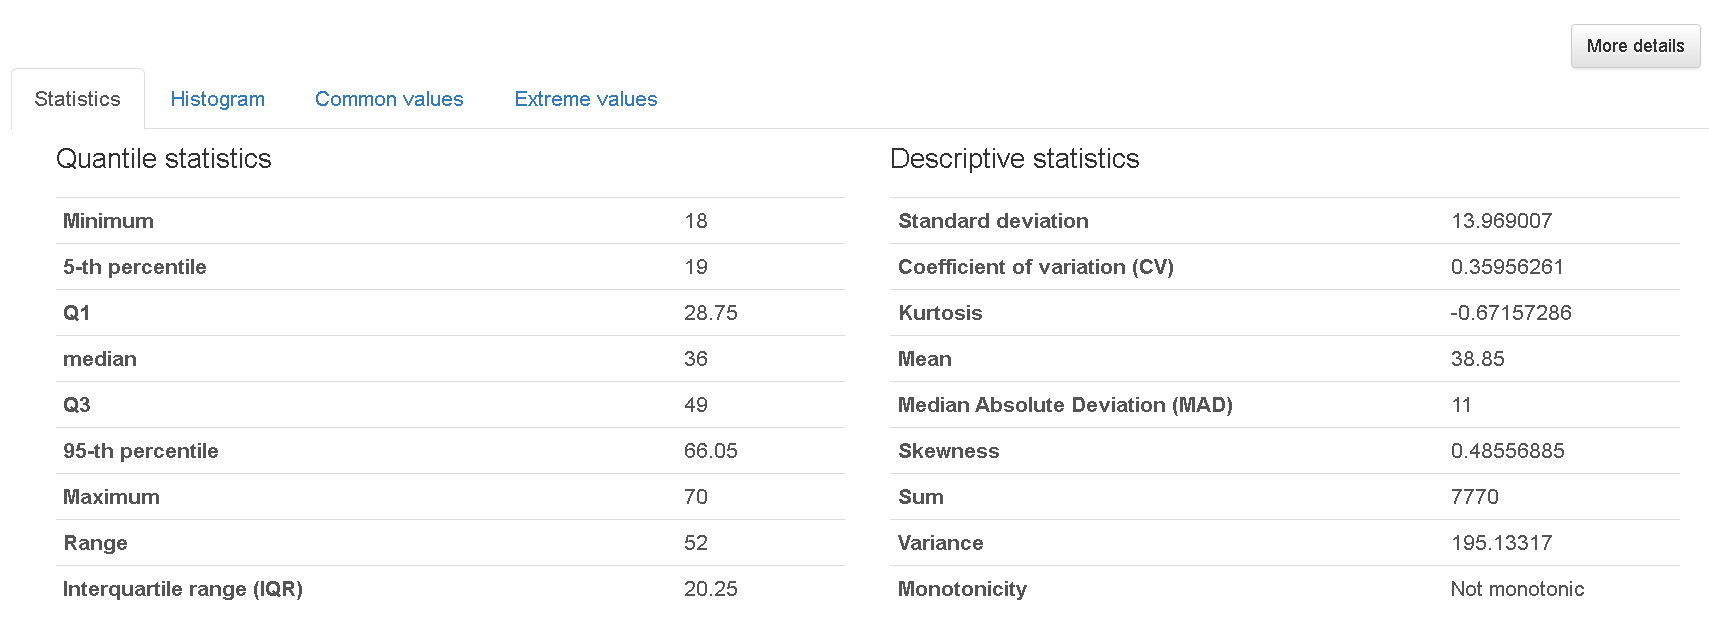

Age Histogram:
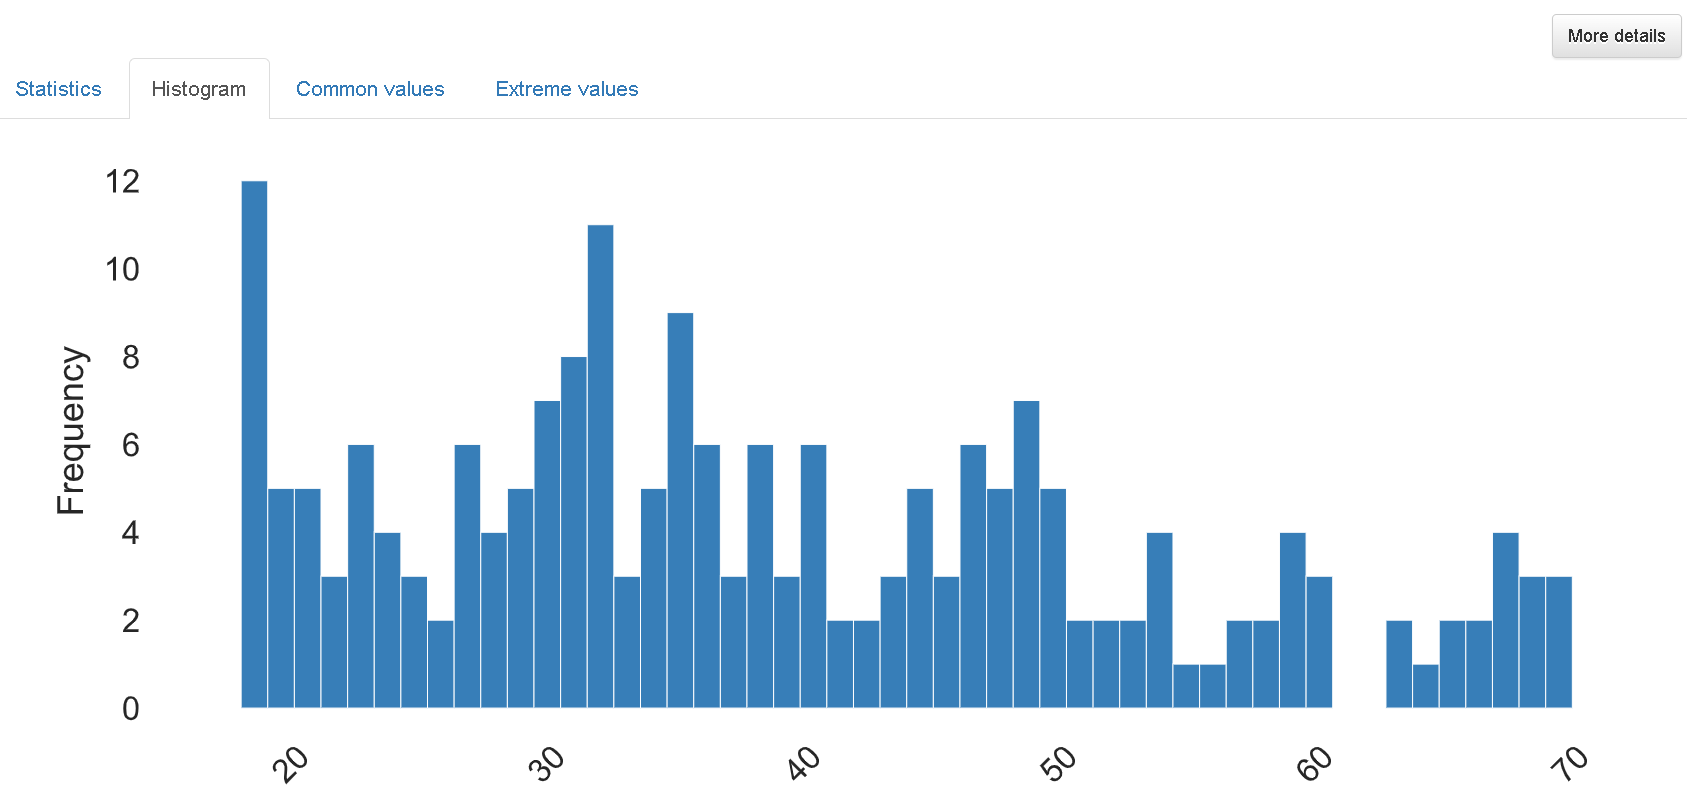

Age Common Values:
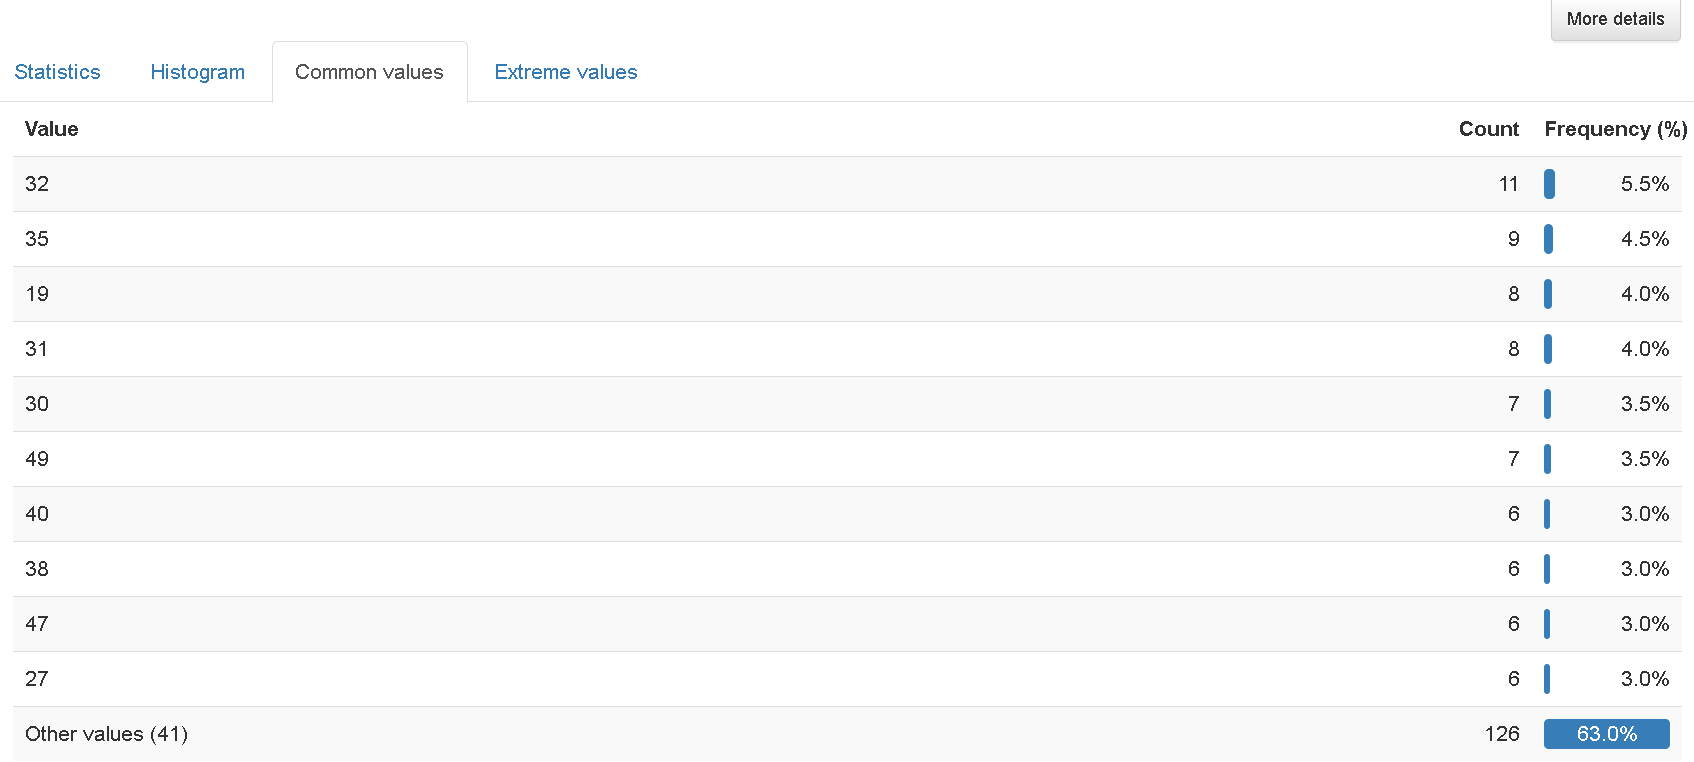

Age Extreme Values:
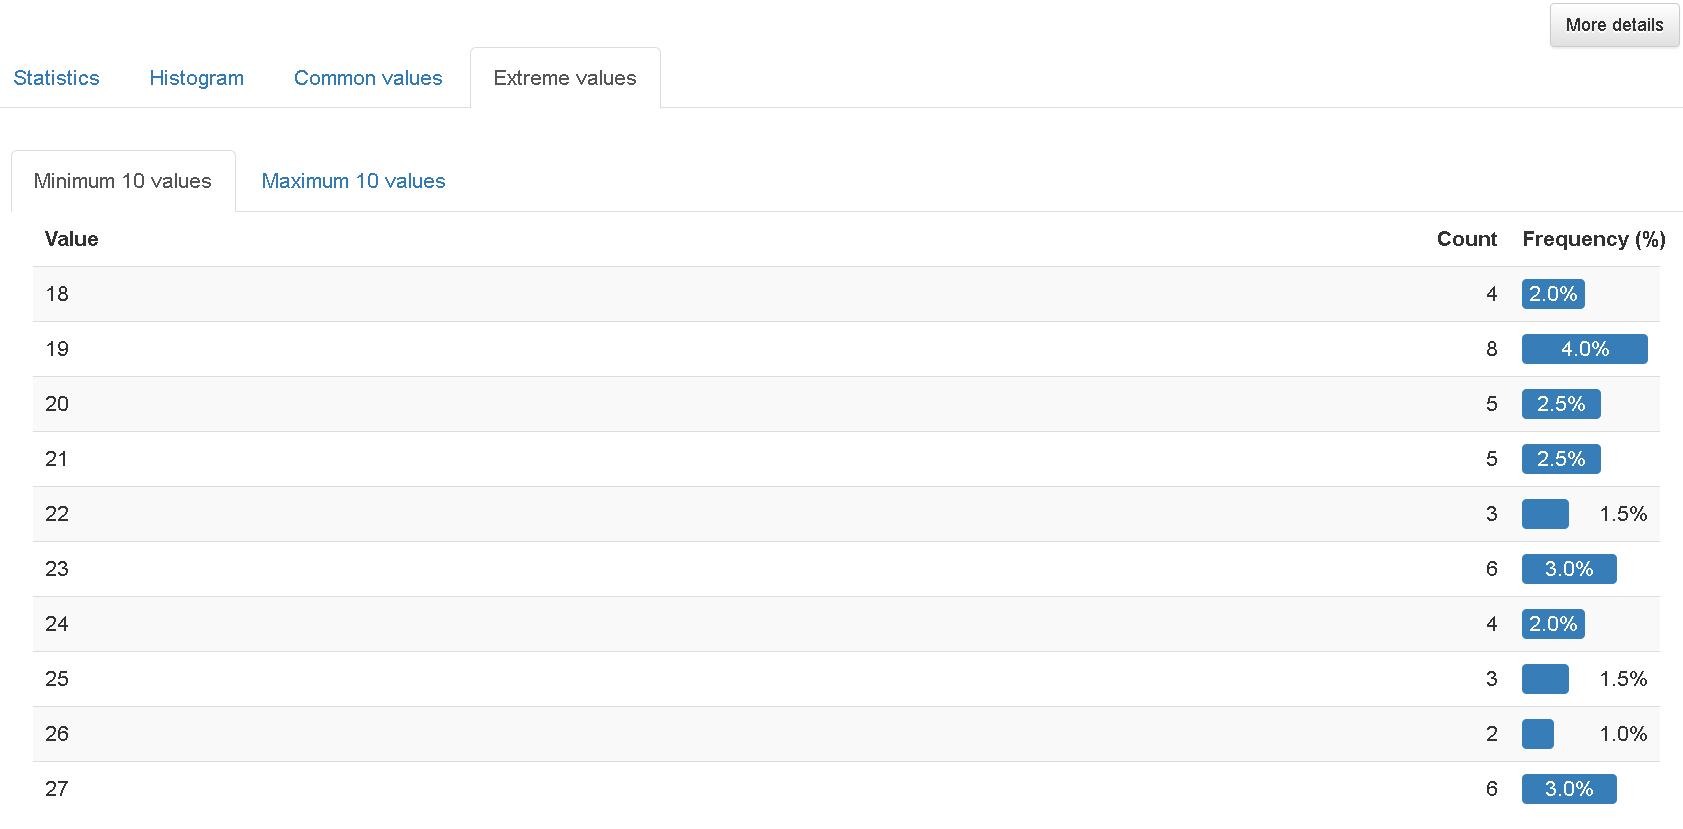

Coluna: Annual Income (k$)
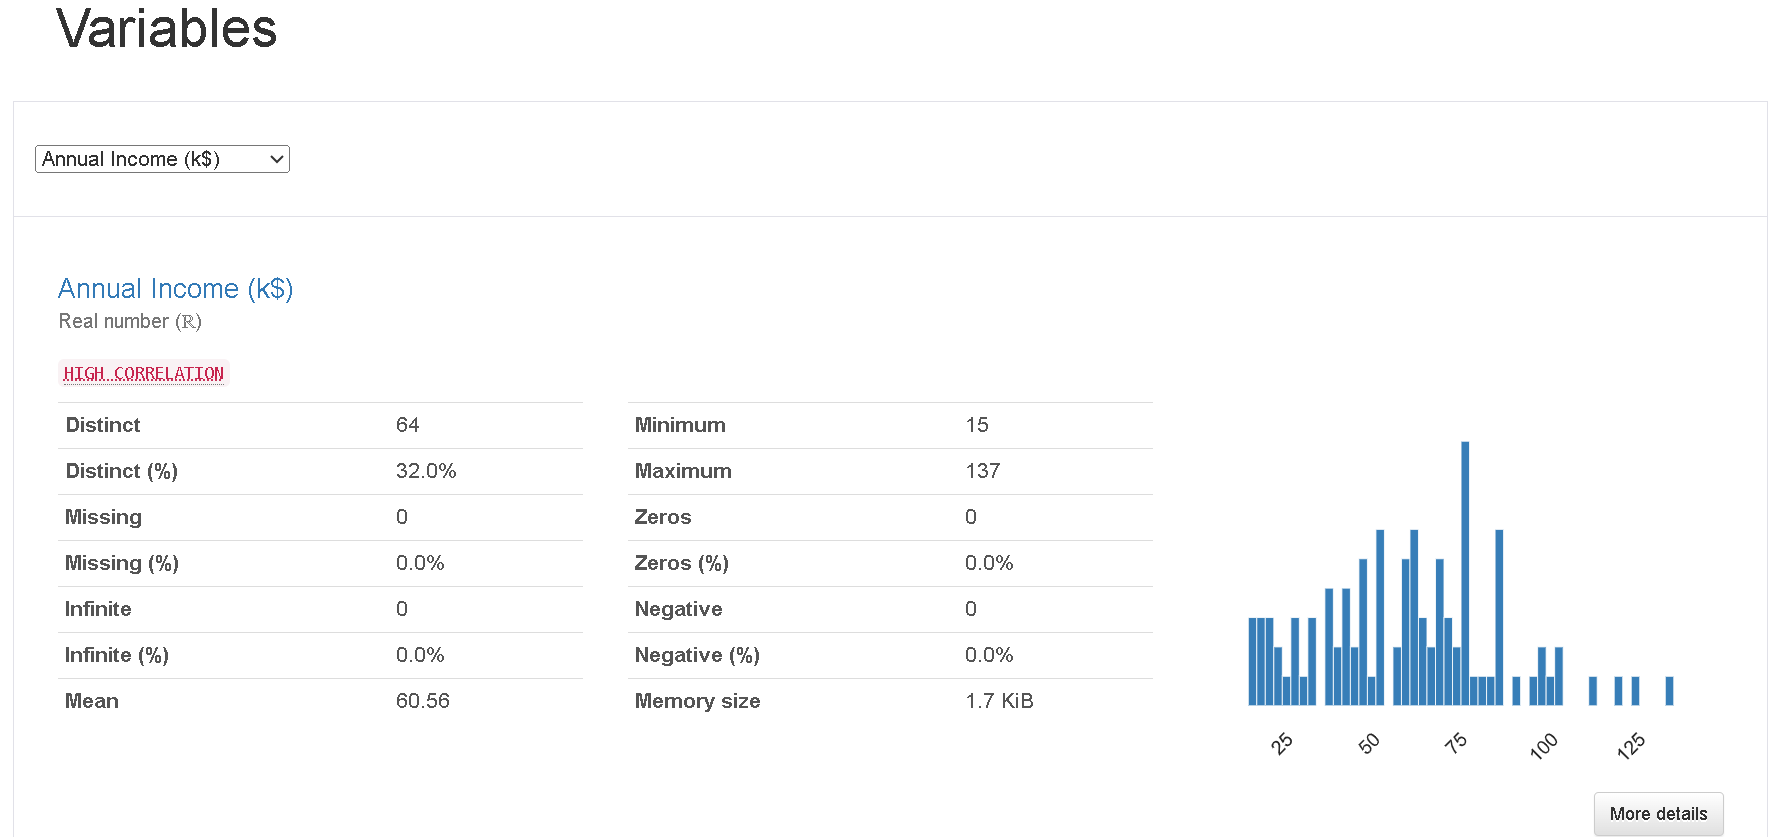

Coluna: Spending Score (1-100)
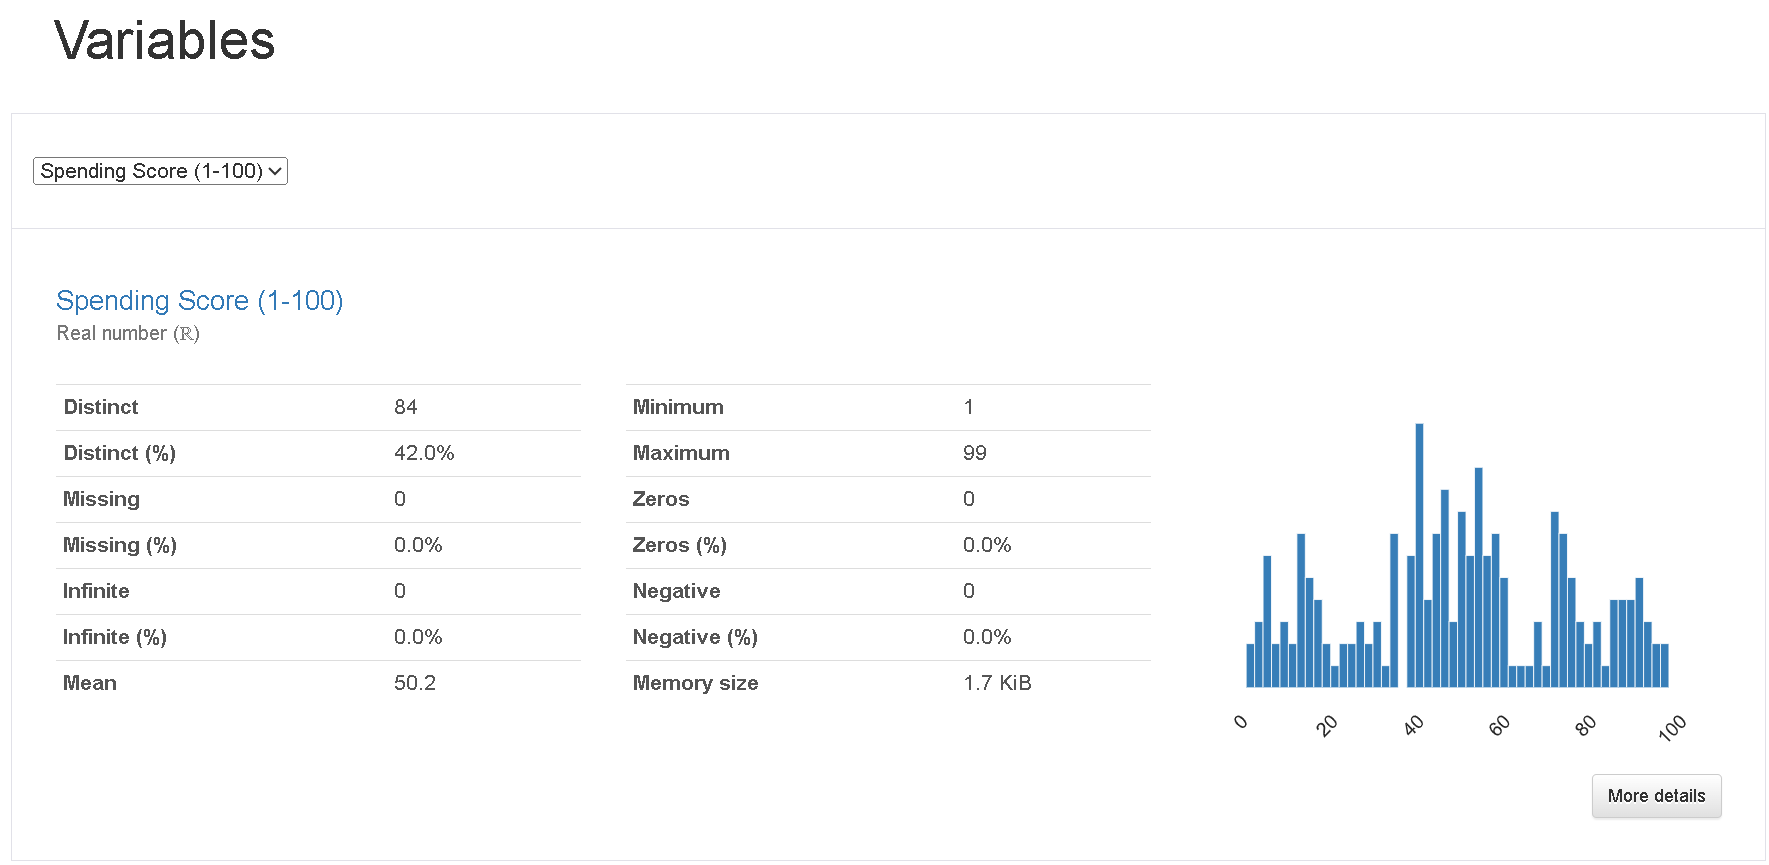

- INTERACTIONS

Annual Income (k$) vs Spending Score (1-100)
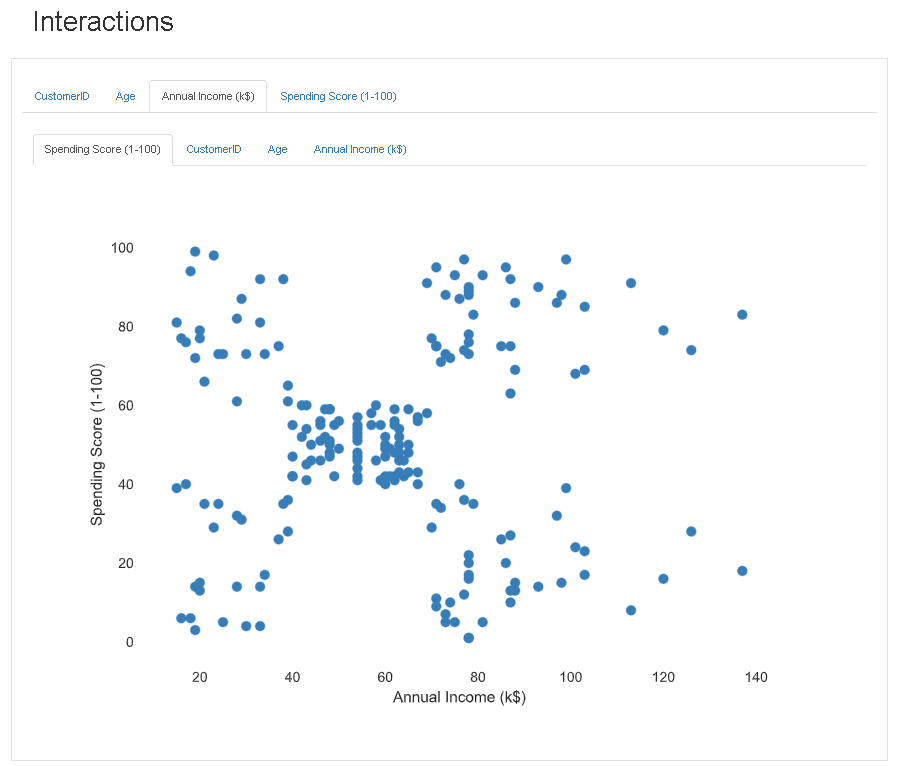

- CORRELATIONS

- 1) Heatmap: 

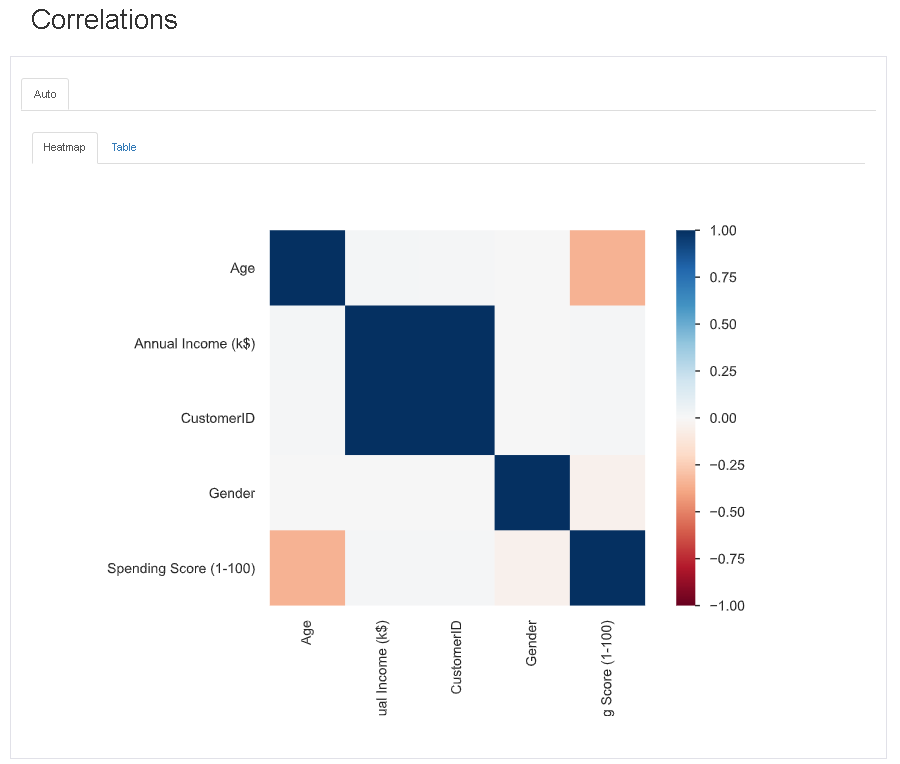

- 2) Table: 

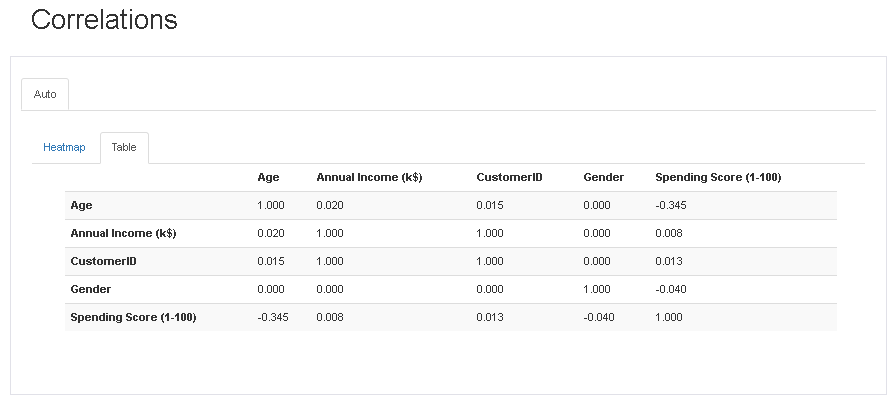

## 2.3) Criando uma Cópia do DataFrame e excluindo a Coluna CustomerID

In [9]:
# Criando uma cópia do DataFrame
df_analise = df.copy()

# Excluindo a Coluna CustomerID
df_analise = df_analise.drop("CustomerID", axis = 1)

# Exibindo as 5 primeiras linhas do DataFrame
df_analise.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### 2.4) Criando um BoxPlot para Análise de possíveis Outliers nas Variáveis Numéricas

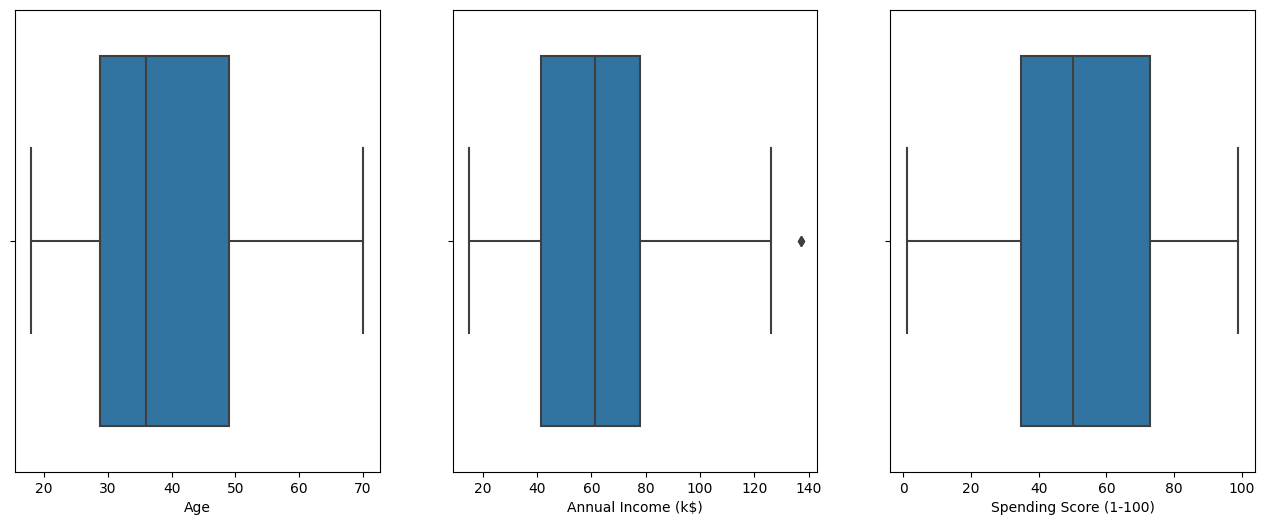

In [10]:
# Importando as bibliotecas
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Criando uma figura com 1 linha e 3 colunas
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

# Percorrer cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo
for ax, col in zip(axs, df_analise.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x as colunas e ax o sistema de eixos
    sns.boxplot(data = df_analise, x = col, ax = ax)

# Exibindo o gráfico    
plt.show()

## Principais aspectos do BoxPlot:
- Na Coluna Age observa-se 50% dos dados entre 30 e 50 anos e a Mediana entre 30 e 40 anos;
- Observada a existência de Outlier na Coluna Annual Income (k$), com 50% dos dados entre 40 e 80k e a Mediana aproximadamente 60k;
- A Coluna Spending Score tem 50% dos dados entre 38 e 78 pontos com Mediana em 50 pontos;

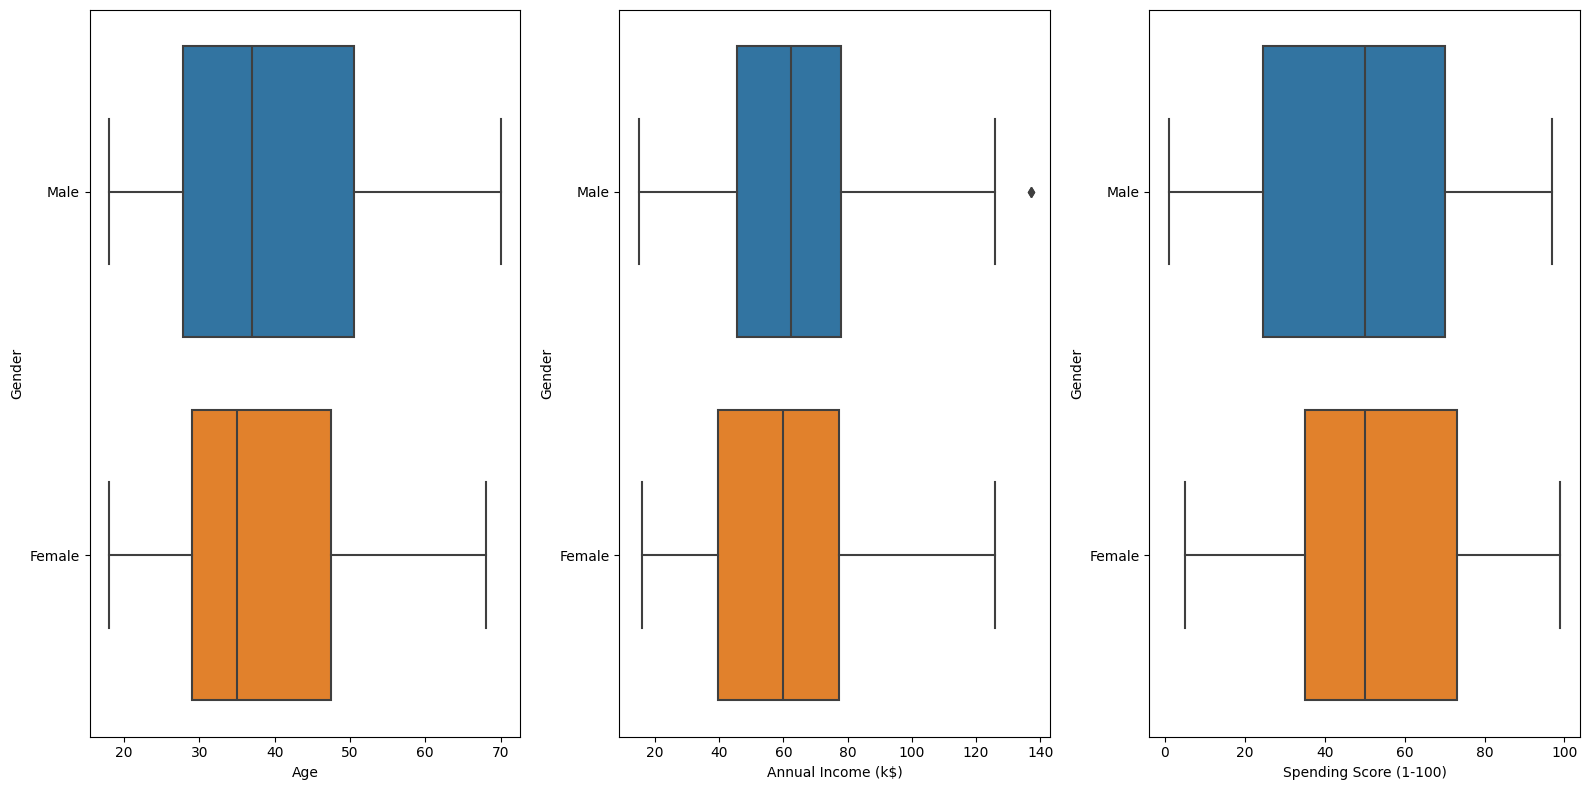

In [11]:
# Criando uma figura com 1 linha e 3 colunas
# Obs.: usando o parâmetro tight_layout = True para não haver a sobreposição das figuras
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 8), tight_layout = True)

# Percorrer cada Eixo e cada Coluna, usando o zip para juntar o sistema de eixos axs para as colunas de tipo numérico
# Obs.: usando o select_dtypes() para selecionar as colunas por tipo
for ax, col in zip(axs, df_analise.select_dtypes("number")):
    # Criando um BoxPlot usando como fonte de dados o DataFrame, o eixo x as colunas e ax o sistema de eixos
    # Obs.: incluindo o eixo y com a variável categórica Gender
    sns.boxplot(data = df_analise, x = col, y = "Gender", ax = ax)

# Exibindo o gráfico    
plt.show()

## 2.5) Matriz de Correlação

### Principais aspectos do BoxPlot no comportamento dos Generos:
- Na Coluna Age observa-se comportamentos bastante semelhantes;
- Os Outliers na Coluna Annual Income (k$) são todos no Genero Masculino;
- A Coluna Spending Score tem 50% dos dados do Genero Feminino um pouco mais elevados;

### Tabela de Correlação do Pandas Profiling Report (Método Spearman)

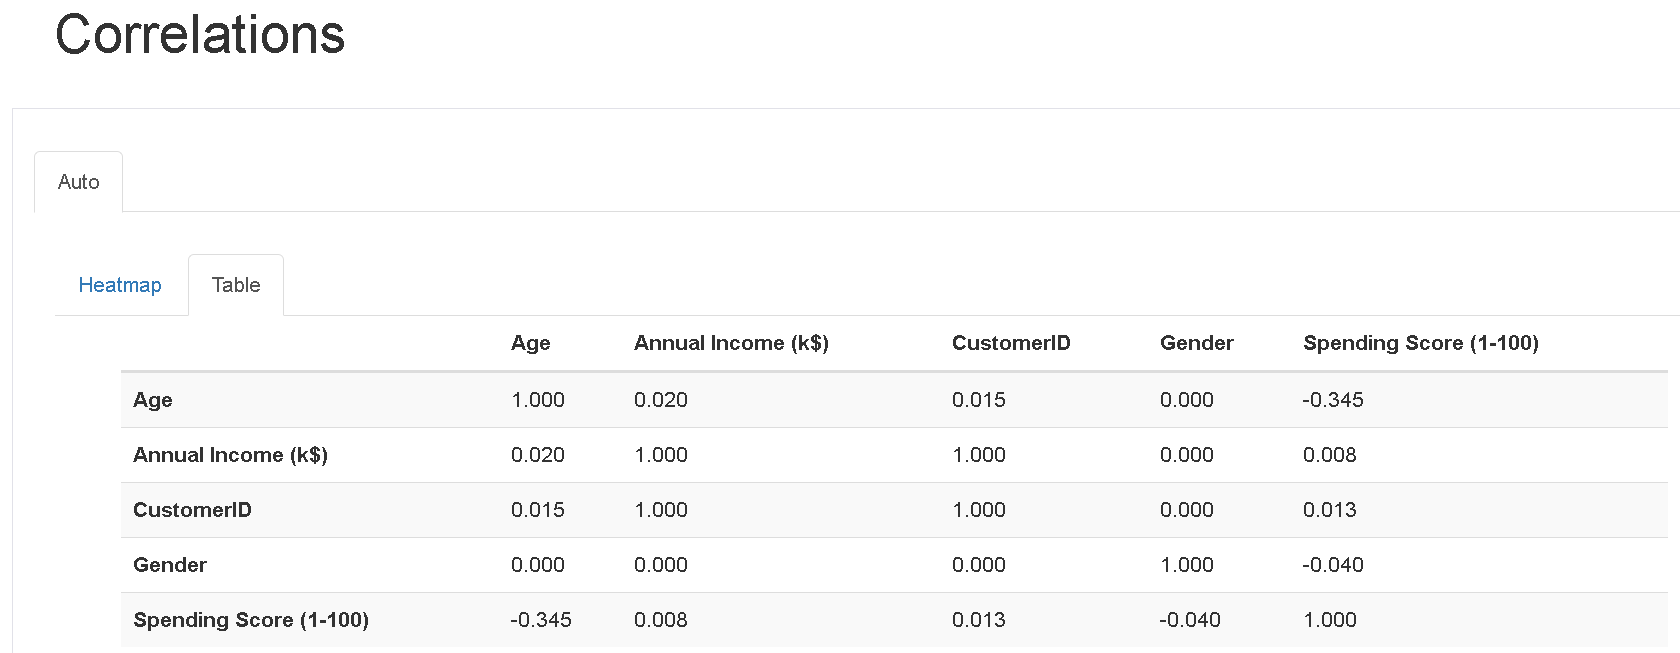

### Matriz de Correlação do Pandas (Método Pearson X Método Spearman)
- Pearson: verifica se a correlação entre as variáveis tem uma tendência linear;
- Spearman: mais genérica, verifica se quando uma variável cresce a outra também cresce, sem avaliar a tendência linear;

In [12]:
# Matriz de Correlação do Pandas (Método )
# Obs.1: usando o parâmetro numeric_only = True para considerar somente as colunas numéricas do DataFrame
# Obs.2: usando o parâmetro method = "spearman" para transformar do Método Pearson para o Método Sperman
df_analise.corr(numeric_only = True, method = "spearman")

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,0.019767,-0.34494
Annual Income (k$),0.019767,1.000000,0.00784
Spending Score (1-100),-0.344940,0.007840,1.00000


In [13]:
# Usando o with, gerenciador de contextos do python
# Obs.: formatando as colunas com 3 casas decimais
with pd.option_context("display.float_format", "{:.3f}".format):
    # Exibindo a Matriz de Correlação no Método Spearman
    display(df_analise.corr(numeric_only = True, method = "spearman"))

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000,0.020,-0.345
Annual Income (k$),0.020,1.000,0.008
Spending Score (1-100),-0.345,0.008,1.000


## 2.5) PAIRPLOTS - Diagramas de Correlação 

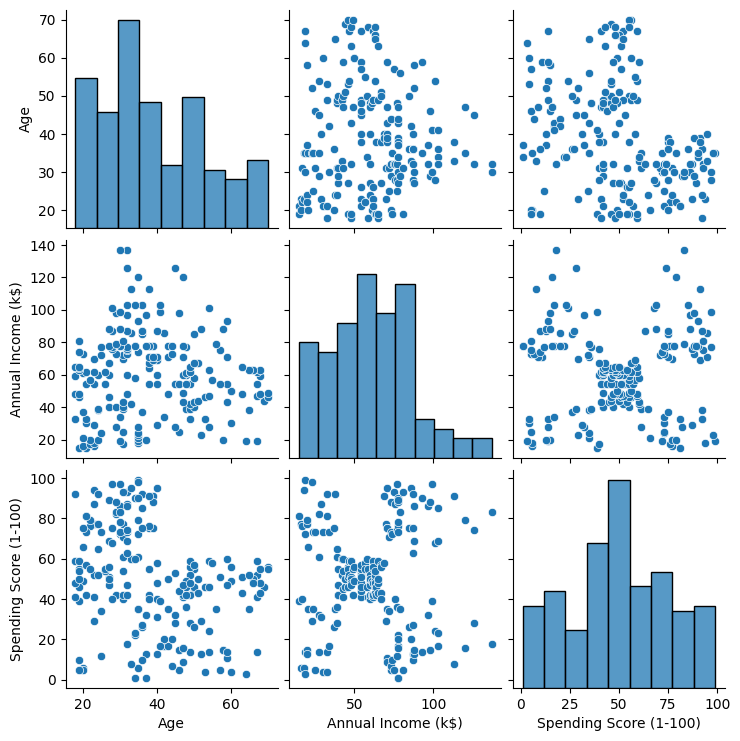

In [14]:
# Criando um pairplot HISTOGRAMAS
# Obs.: Na diagonal a informação dos histogramas e nas demais posições os pares mostrando os diagramas de dispersão das variáveis numéricas
sns.pairplot(df_analise);

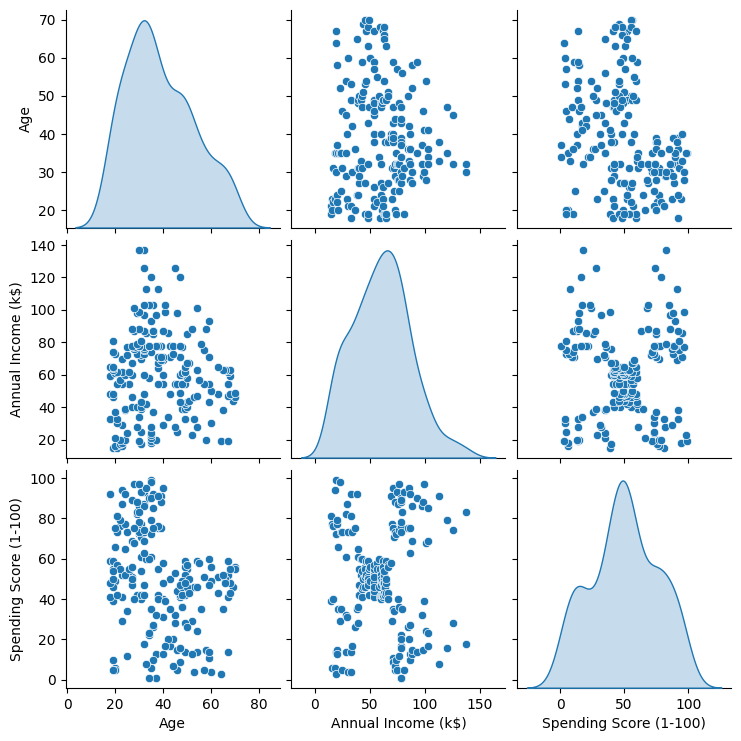

In [15]:
# Criando um pairplot KDE's (Superfície suavizada)
# Obs.: Na diagonal a informação dos histogramas e nas demais posições os pares mostrando os diagramas de dispersão das variáveis numéricas
sns.pairplot(df_analise, diag_kind = "kde");

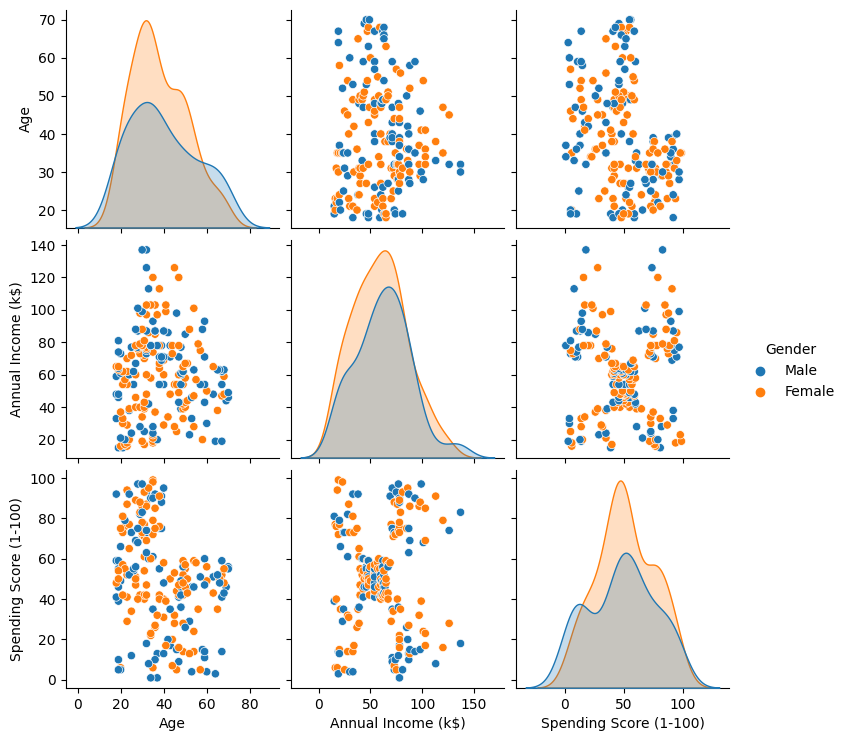

In [16]:
# Criando um pairplot KDE's (Superfície suavizada)
# Obs.1: Na diagonal a informação dos histogramas e nas demais posições os pares mostrando os diagramas de dispersão das variáveis numéricas
# Obs.2: Incluindo o parâmetro hue = "Gender" com as informações da Coluna Categórica Gender
sns.pairplot(df_analise, diag_kind = "kde", hue = "Gender");

### Principais aspectos dos Pairplots:
- A curva do genero feminino é uma pouco mais alta pois possui mais entradas no Dataset;
- Os formatos das curvas não são tão diferentes;
- Não há a concentração de pontos de uma cor em uma determinada região;
- Não existe de forma clara uma grande diferenciação dos generos neste Dataset;
- Pode ser que utilizando algoritmos de Clusterização seja possível perceber isso;

In [17]:
# Salvando/Exportando uma Nova Versão do arquivo csv sem a Coluna CustomerID
# Obs.1: no caso de Dataset's com diversas etapas de tratamento faz sentido renomear o arquivos csv;
# Obs.2: em Dataset's muito grandes, devido à utilização de espaço em disco, utiliza-se o Script para fazer a limpeza dos dados;
# Obs.3: usando o parâmetro index = False para exclusão dos índices;
# Obs.4: criando o arquivo na pasta dados;
df_analise.to_csv("../dados/Mall_Customers_no_CustomerID.csv", index = False)